In [21]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
np.random.seed(0)
data = pd.read_csv('iris.data', header=None)

In [23]:
iris_types = data[4].unique()

In [24]:
for i, iris_type in enumerate(iris_types):
    data.set_value(data[4] == iris_type, 4, i)

In [25]:
x = data.iloc[:, :2]
n, features = x.shape
print x.head()

     0    1
0  5.1  3.5
1  4.9  3.0
2  4.7  3.2
3  4.6  3.1
4  5.0  3.6


In [26]:
y = data.iloc[:, -1].astype(np.int)
c_number = np.unique(y).size

## 数据切割，onthot

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import label_binarize

In [28]:
x, x_test, y, y_test = train_test_split(x, y, train_size=0.6, random_state=0)
y_one_hot = label_binarize(y_test, classes=np.arange(c_number))

## 模型构建

In [29]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [30]:
alpha = np.logspace(-2, 2, 20)
models = [
    ['KNN', KNeighborsClassifier(n_neighbors=7)],
    ['LogisticRegression', LogisticRegressionCV(Cs=alpha, penalty='l2', cv=3)],
    ['SVM(Linear)', GridSearchCV(SVC(kernel='linear', decision_function_shape='ovr'), param_grid={'C': alpha})],
    ['SVM(RBF)', GridSearchCV(SVC(kernel='rbf', decision_function_shape='ovr'), param_grid={'C': alpha, 'gamma': alpha})]
]

In [31]:
from itertools import cycle

In [32]:
colors = cycle('gmcr')
mpl.rcParams['font.sans-serif'] = u'SimHei'
plt.figure(figsize=(7,6))

In [33]:
from sklearn import metrics

KNN predict_proba
0.877083333333
[ 2.06913808  2.06913808  0.11288379]
LogisticRegression predict_proba
0.890972222222
{'C': 0.11288378916846889}
SVM(Linear)
0.880694444444
{'C': 0.18329807108324356, 'gamma': 0.48329302385717521}
SVM(RBF)
0.892361111111


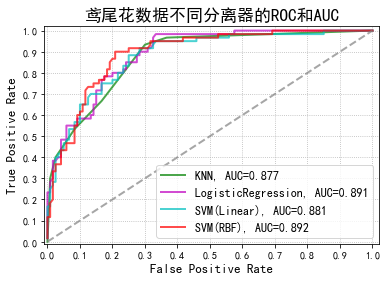

In [34]:
for (name, model), color in zip(models, colors):
    model.fit(x, y)
    if hasattr(model, 'C_'):
        print model.C_
    if hasattr(model, 'best_params_'):
        print model.best_params_
    if hasattr(model, 'predict_proba'):
        print name,'predict_proba'
        y_score = model.predict_proba(x_test)
    else:
        print name
        y_score = model.decision_function(x_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(), y_score.ravel())
    auc = metrics.auc(fpr, tpr)
    print auc
    plt.plot(fpr, tpr, c=color, lw=2, alpha=0.7, label=u'%s, AUC=%.3f' %(name, auc))

plt.plot((0,1),(0,1), c='#808080', lw=2, ls='--', alpha=0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='best', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'鸢尾花数据不同分离器的ROC和AUC', fontsize=17)
plt.show()